In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# 0-initial-research

Dane pochodzą z:
* https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* https://github.com/AustinReese/UsedVehicleSearch

In [3]:
orig = pd.read_csv('../data/raw/vehicles.csv')

In [4]:
df = orig.copy()

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.shape

(426880, 26)

In [7]:
sorted(df.columns)

['VIN',
 'condition',
 'county',
 'cylinders',
 'description',
 'drive',
 'fuel',
 'id',
 'image_url',
 'lat',
 'long',
 'manufacturer',
 'model',
 'odometer',
 'paint_color',
 'posting_date',
 'price',
 'region',
 'region_url',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'url',
 'year']

In [8]:
to_drop = [
    'VIN',
    'id',
    'image_url',
    'region_url',
    'url',
    'posting_date',
    'state',
    'county'
]

df.drop(to_drop, axis=1, inplace=True)

## Brakujące wartości

In [9]:
missing = pd.DataFrame(
    data=df.isna().sum() / len(df) * 100, 
    columns=['Pct']
)
missing.sort_values('Pct', ascending=False, inplace=True)

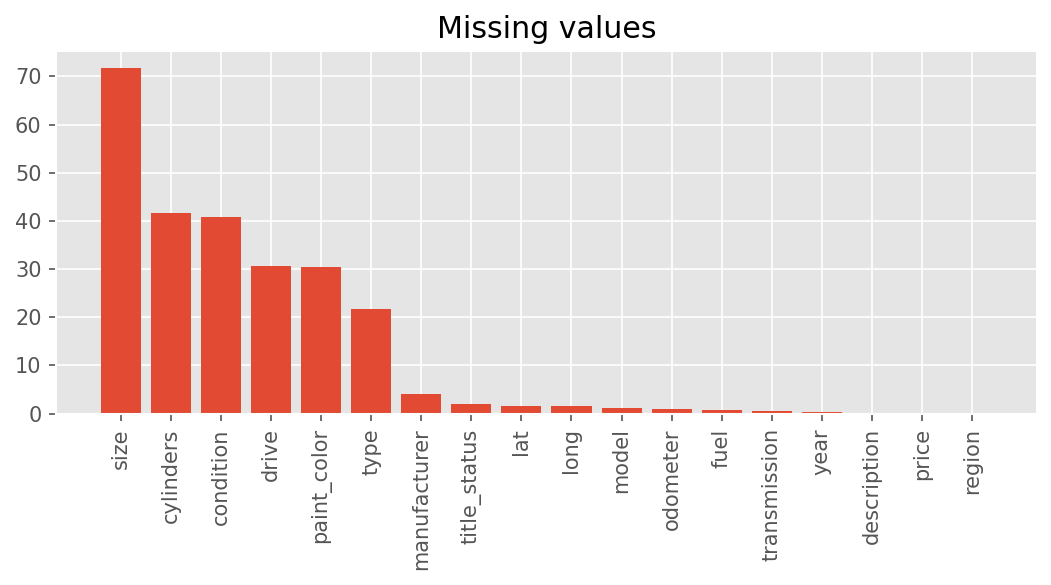

In [10]:
plt.figure(figsize=(4 * (16/9),4), dpi=150)
plt.bar(missing.index, missing['Pct'])
plt.title('Missing values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'../reports/figures/raw/missing.png')
plt.show()

## Zmienna objaśniana

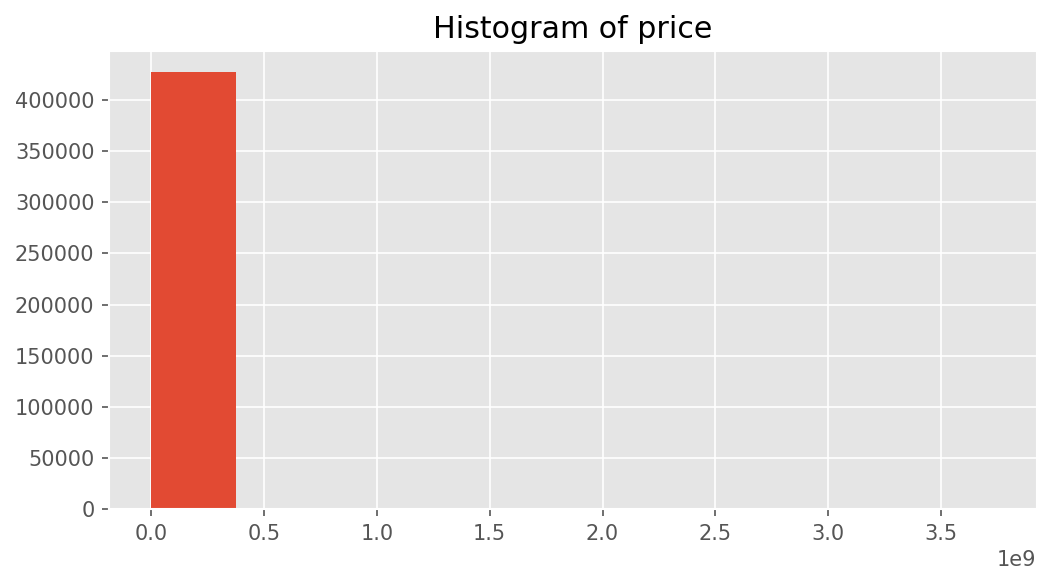

In [11]:
plt.figure(figsize=(4 * (16/9),4), dpi=150)
plt.hist(df['price'])
plt.title('Histogram of price')
plt.tight_layout()
plt.savefig(f'../reports/figures/raw/price_histogram.png')
plt.show()

## Zmienne kategoryczne

### Feature cardinality

In [12]:
categoricals = pd.DataFrame(
    data=df.select_dtypes('object').nunique(),
    columns=['n unique']
)

In [13]:
categoricals.sort_values('n unique', ascending=False)

,n unique
description,360911
model,29667
region,404
manufacturer,42
type,13
paint_color,12
cylinders,8
condition,6
title_status,6
fuel,5


## Wykresy słupkowe

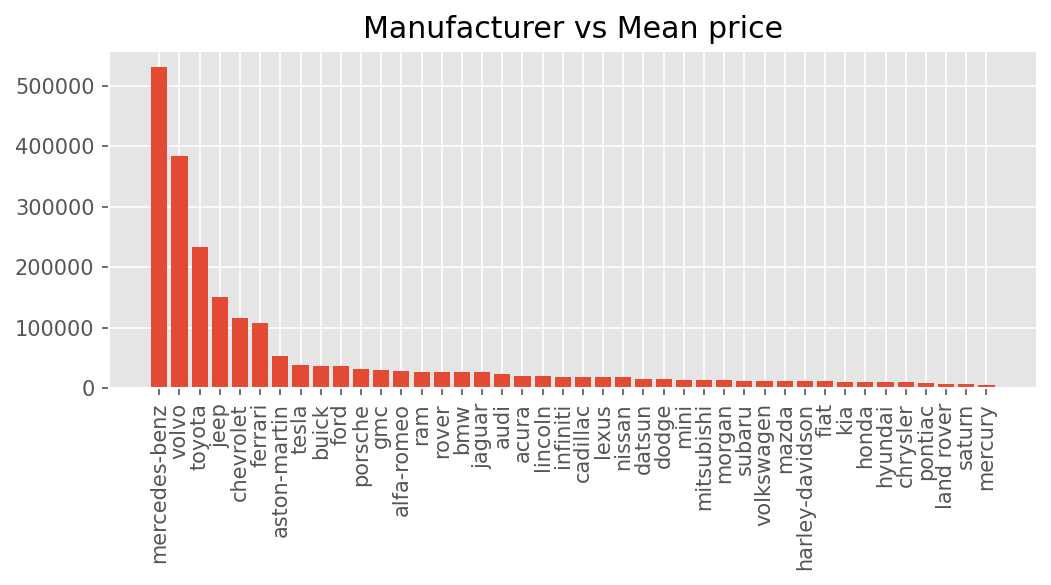

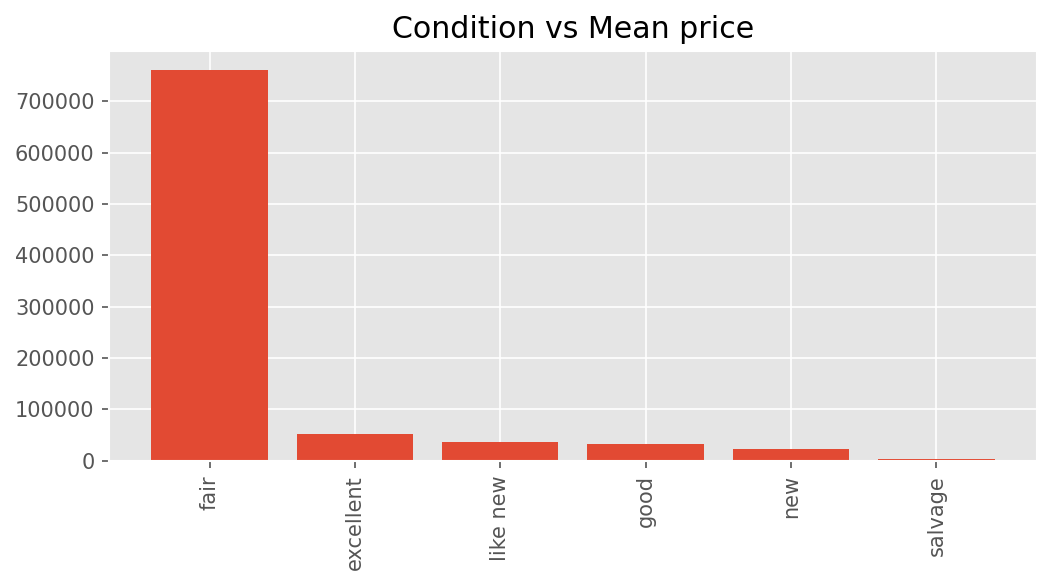

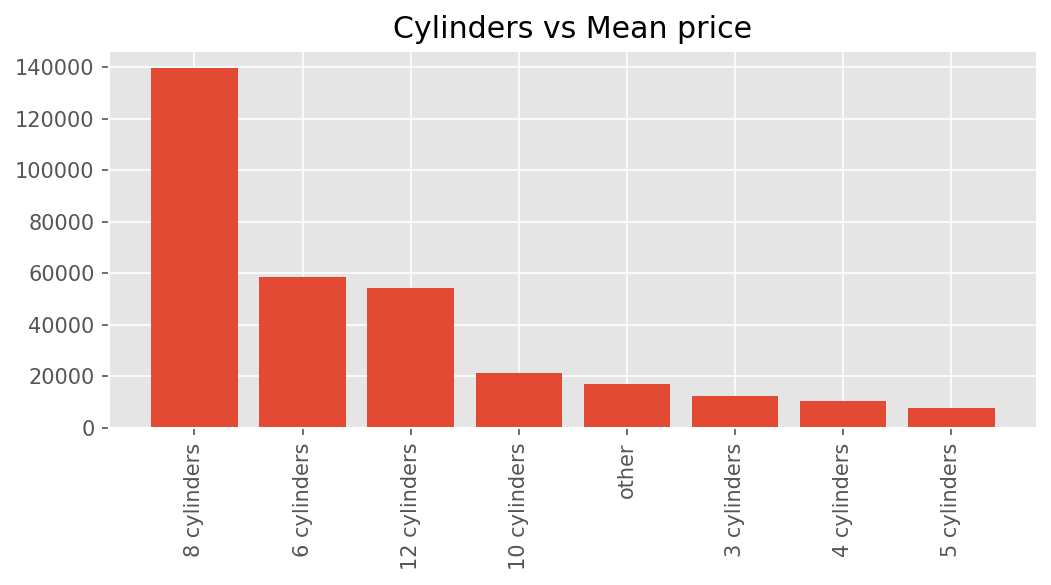

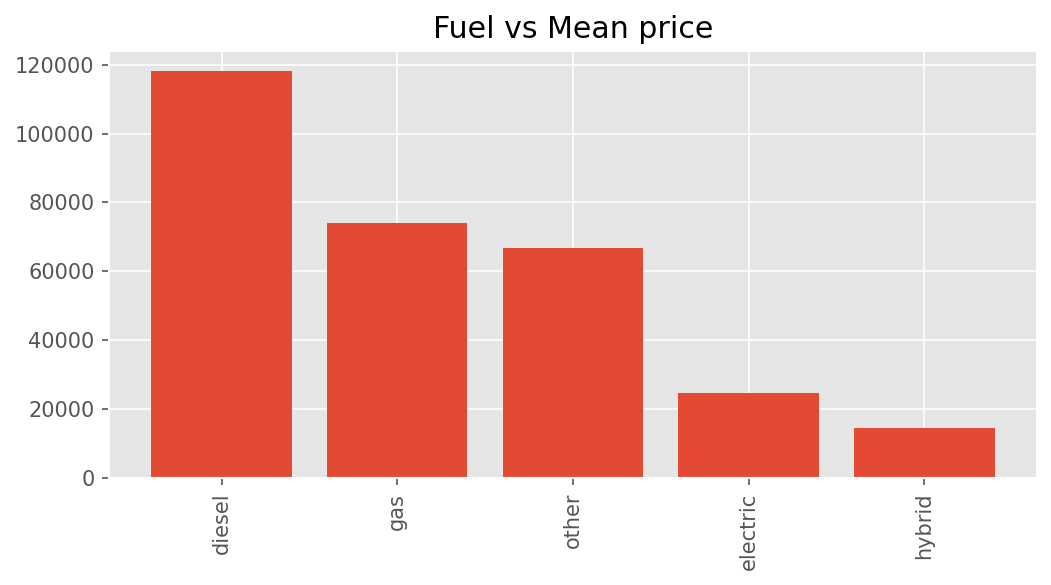

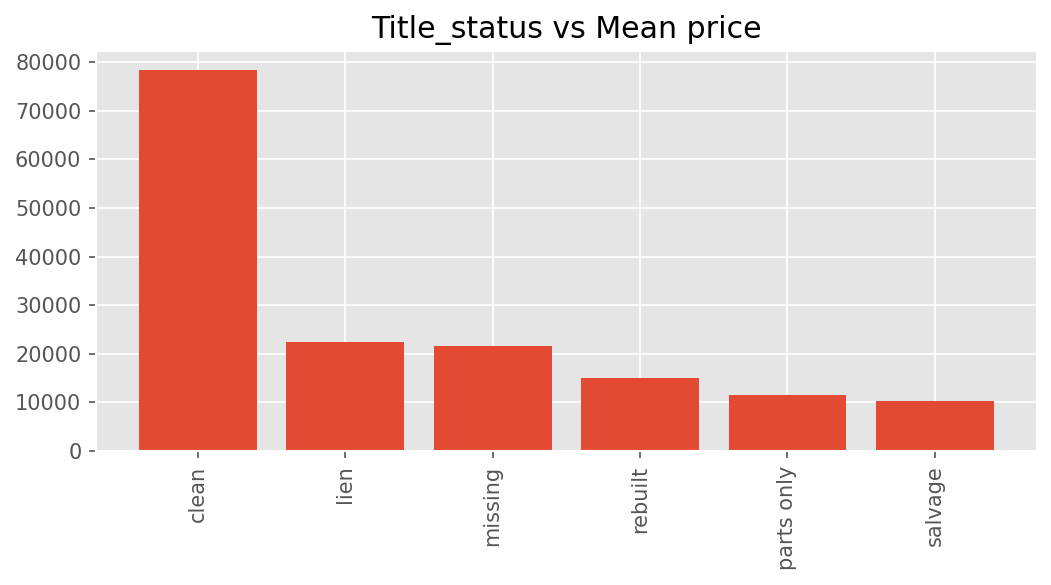

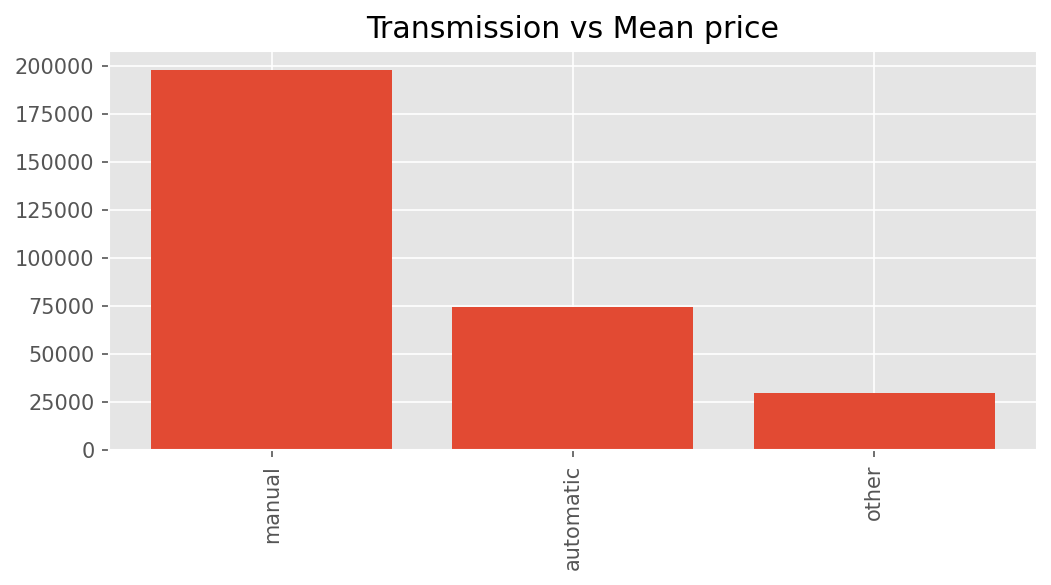

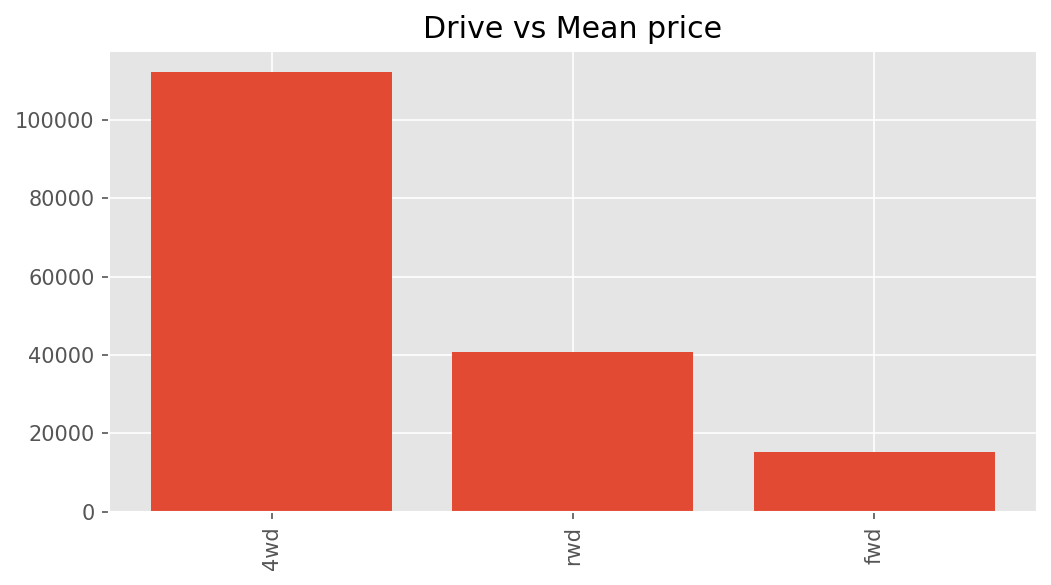

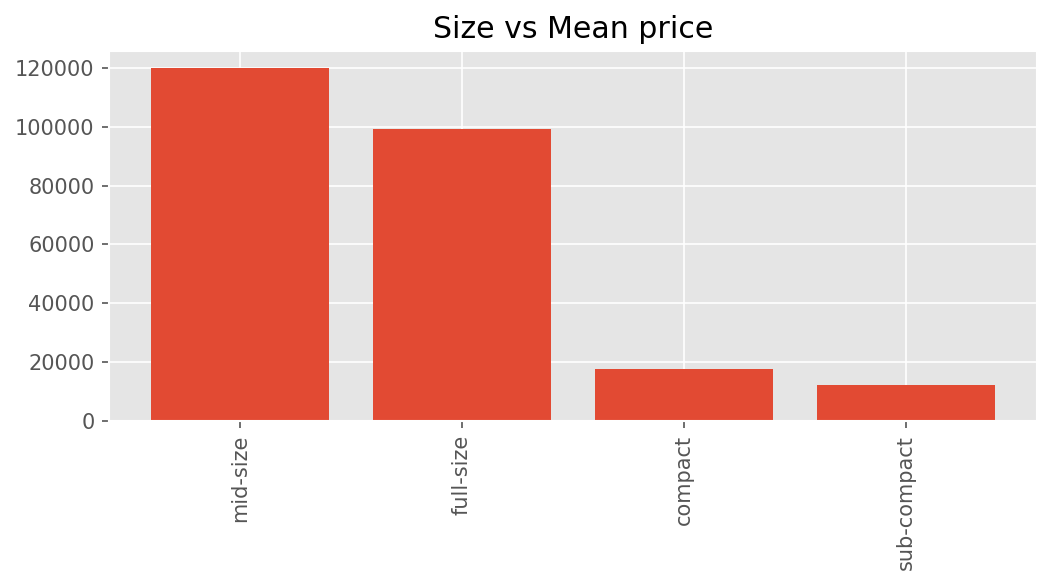

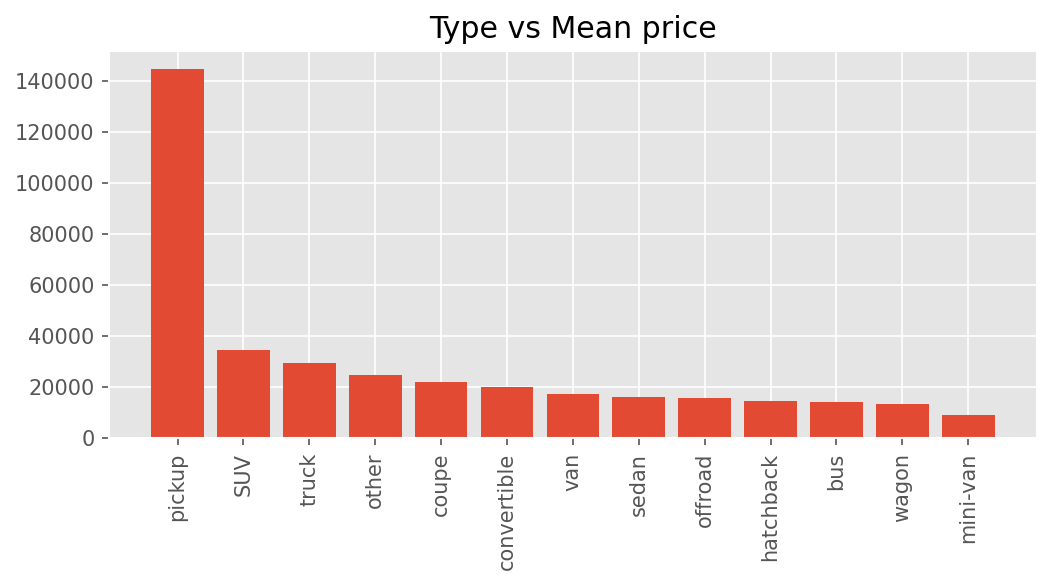

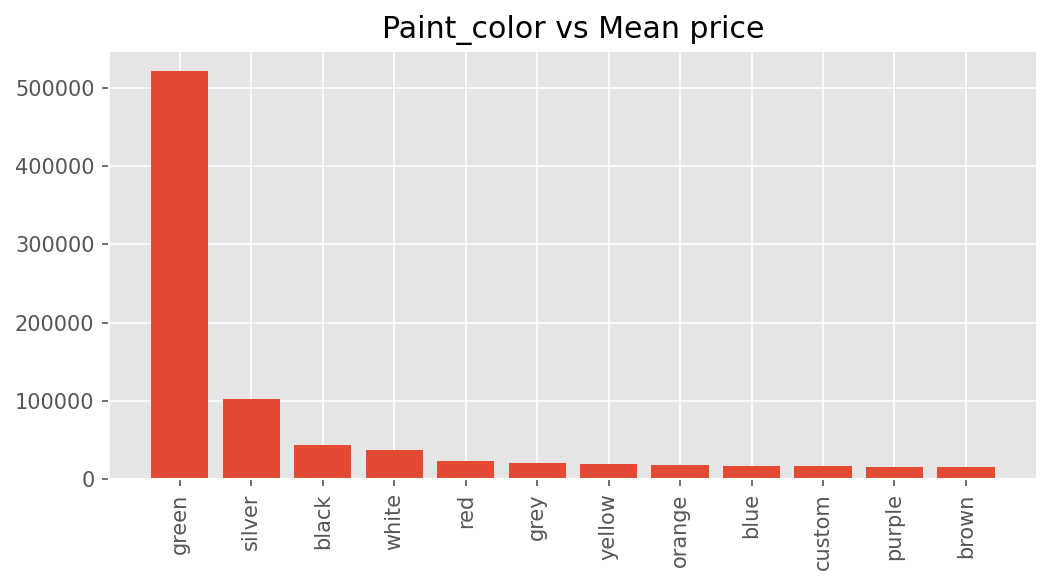

In [14]:
target = 'price'
for col in  df.select_dtypes('object'):
    if col not in ['price', 'description', 'region', 'model']:
        grouped = df[['price', col]].dropna().groupby(col, as_index=False).mean()
        grouped.sort_values('price', ascending=False, inplace=True)
        plt.figure(figsize=(4 * (16/9),4), dpi=150)
        plt.bar(grouped[col], grouped['price'])
        plt.xticks(rotation=90)
        plt.title(f'{col.capitalize()} vs Mean price')
        plt.tight_layout()
        plt.savefig(f'../reports/figures/raw/{col}_vs_mean_price.png')

## Zmienne liczbowe

### Histogramy

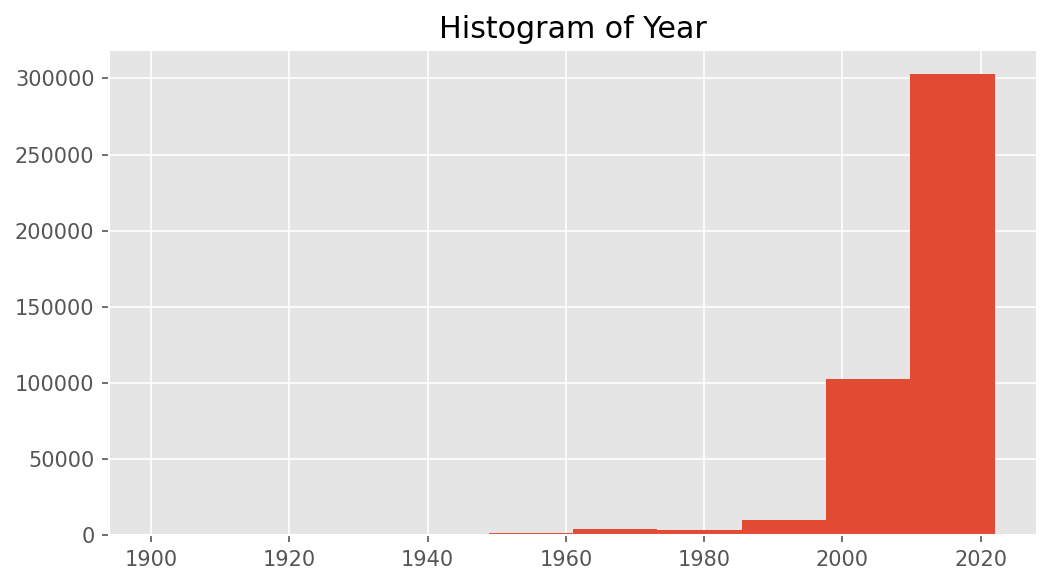

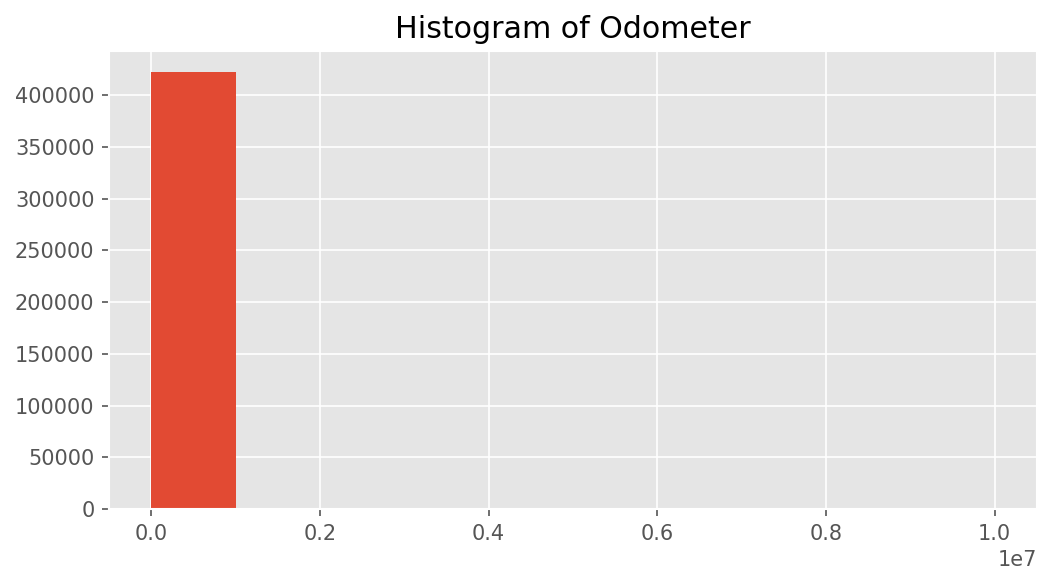

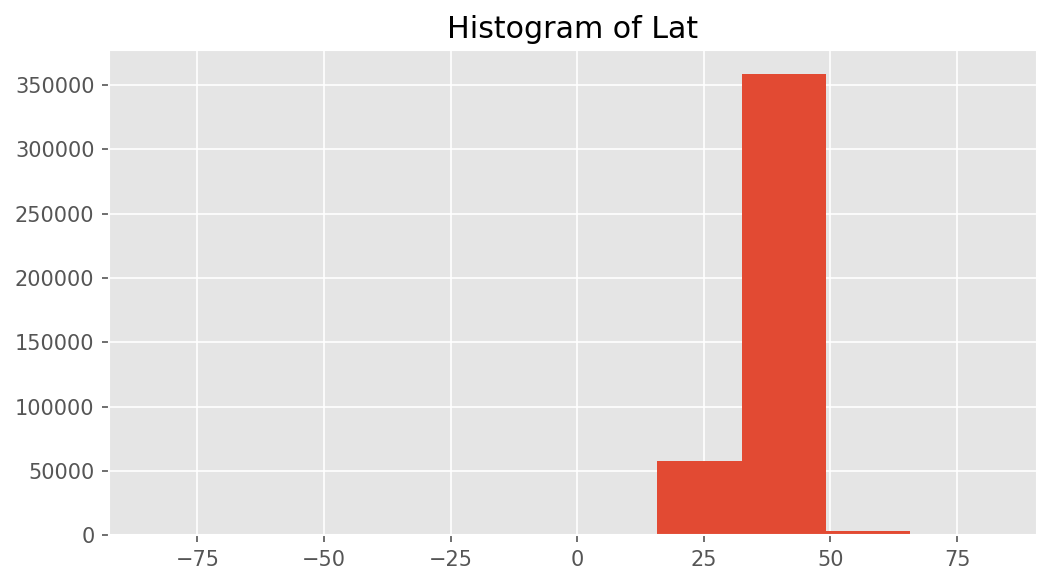

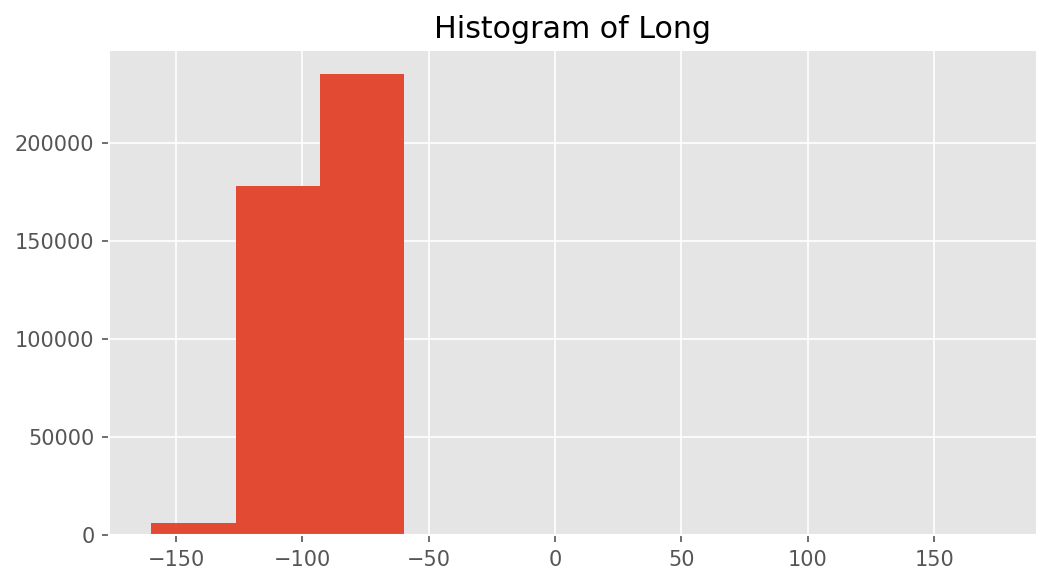

In [15]:
target = 'price'
for col in df.select_dtypes('number'):
    if col != 'price':
        plt.figure(figsize=(4 * (16/9),4), dpi=150)
        plt.hist(df[col])
        plt.title(f'Histogram of {col.capitalize()}')
        plt.tight_layout()
        plt.savefig(f'../reports/figures/raw/histogram_{col}.png')

### Wykresy punktowe

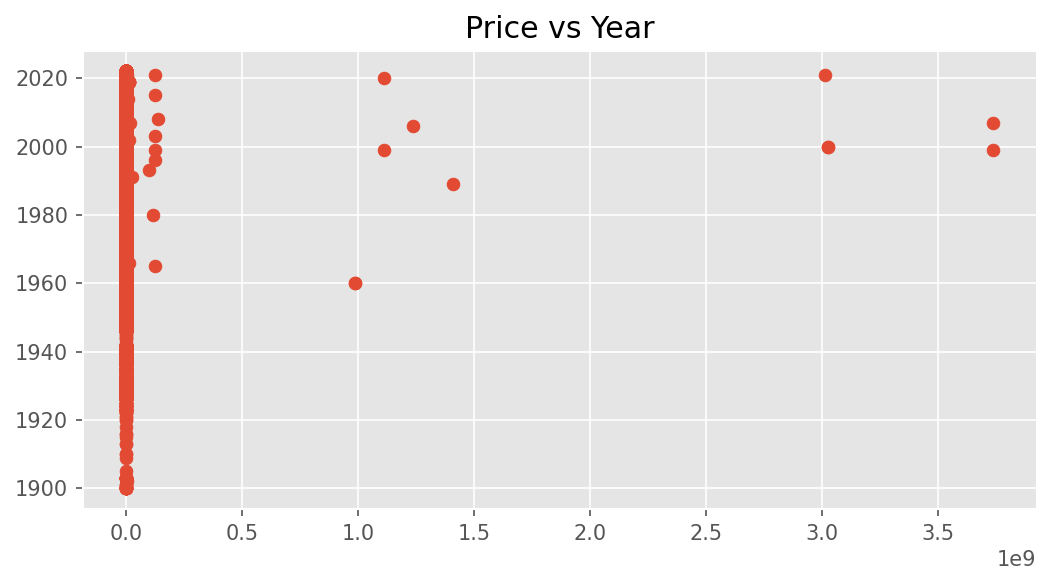

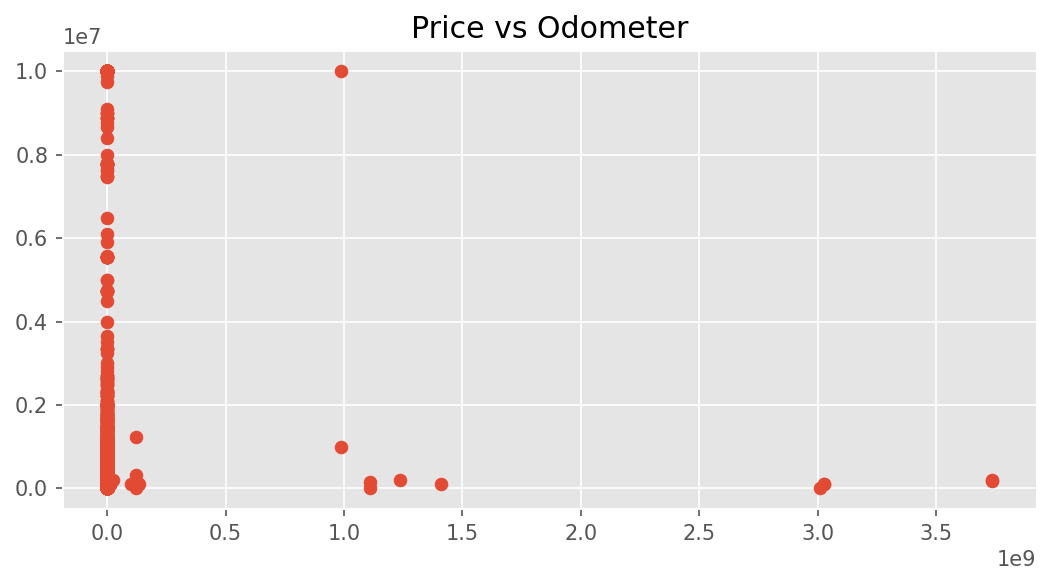

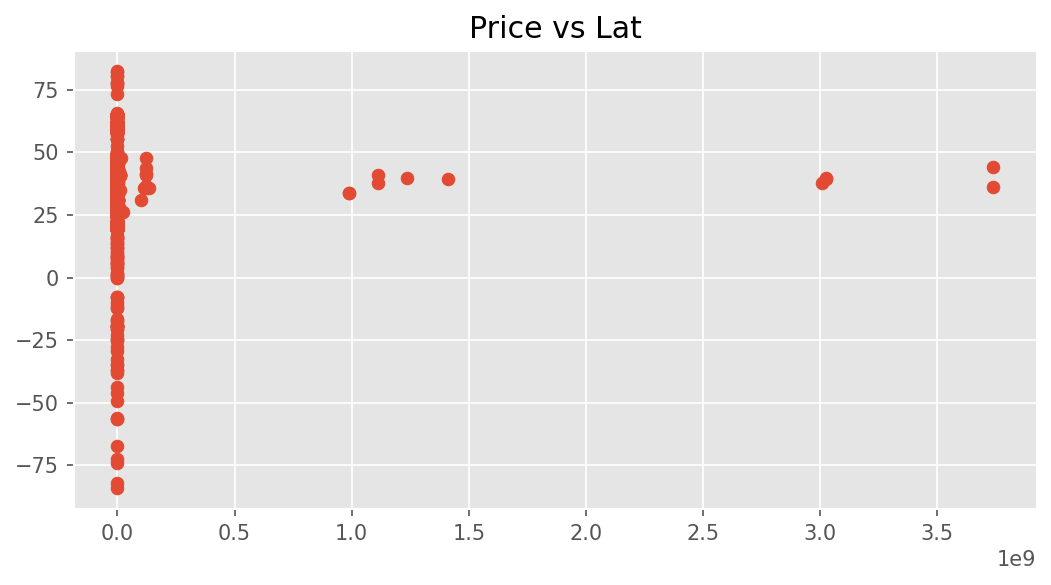

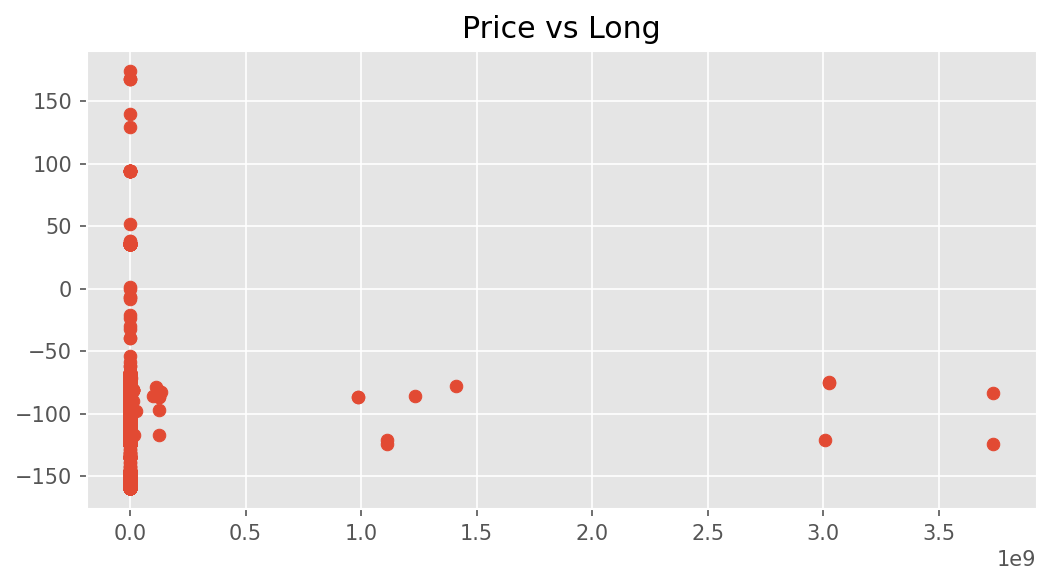

In [16]:
target = 'price'
for col in df.select_dtypes('number'):
    if col != 'price':
        plt.figure(figsize=(4 * (16/9),4), dpi=150)
        plt.scatter(df[target], df[col])
        plt.title(f'{target.capitalize()} vs {col.capitalize()}')
        plt.tight_layout()
        plt.savefig(f'../reports/figures/raw/{col}_vs_price.png')

### Statystyki opisowe

In [17]:
df.select_dtypes('number').describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [18]:
del orig
del df